In [25]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
time_trend = 1.5
sigsq  = 3
sigsq_u = 5
sample_size = 50

state = [np.random.laplace(time_trend, sigsq)]
Y = [state[-1] + np.random.logistic(0.0, sigsq_u) ]

for time in range(1, sample_size):
    state.append( state[-1] + np.random.laplace(time_trend, sigsq) )
    Y.append(state[-1] + np.random.logistic(0.0, sigsq_u))

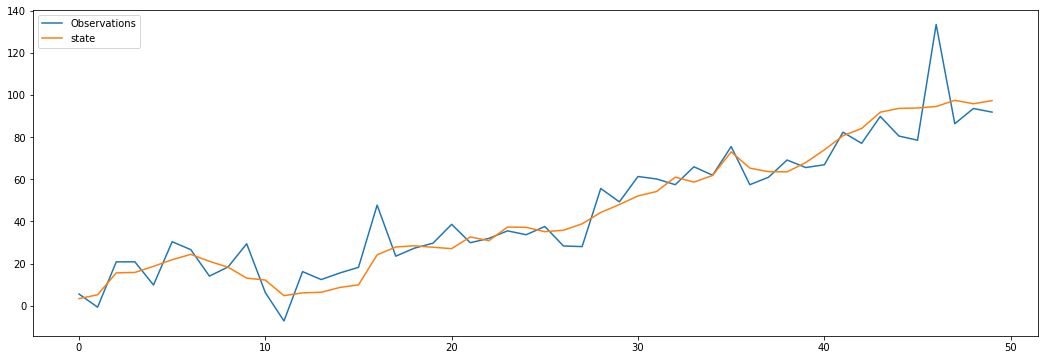

In [31]:
fig, ax = plt.subplots(figsize = (18,6))
pd.DataFrame({'Observations':Y, 'state':state}).plot(ax = ax)

In [29]:
particle_count = 1000
particle_df = pd.DataFrame(columns = range(0,particle_count))

particle_df.loc[0] = time_trend + np.random.uniform(-10,10, particle_count)

for time in range(0, sample_size):
    weights = np.exp( -1.0* np.square(Y[time] - particle_df.loc[time].values))
    new_particles =  random.choices(particle_df.loc[time].values , weights, k=particle_count) + np.random.uniform(-10,10, particle_count)
    particle_df.loc[time+1] = new_particles + time_trend

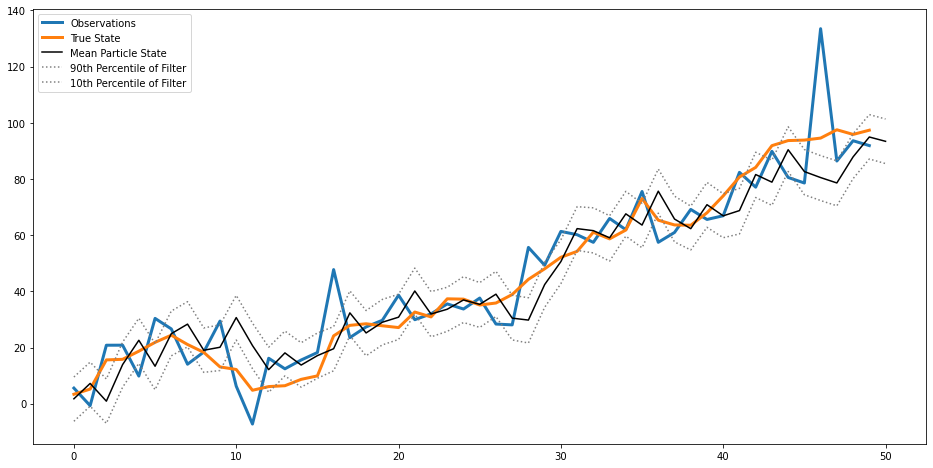

In [32]:
fig, ax = plt.subplots(figsize = (16,8))

pd.DataFrame({'Observations':Y, 'state':state}).plot(ax = ax, linewidth = 3)
particle_df.mean(axis = 1).plot(ax =ax , color = 'black')
particle_df.quantile(.9, axis =1).plot(color = 'gray',  linestyle = ':')
particle_df.quantile(.1, axis =1).plot(color = 'gray',  linestyle = ':')

ax.legend(['Observations','True State','Mean Particle State', '90th Percentile of Filter','10th Percentile of Filter'])